In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import diffrax

In [2]:
def f(x, y, args):
    u = y[..., 0]
    v = y[..., 1]
    return jnp.array([v, 3.*x**2*v-(1.-x)*u])

In [3]:
term = diffrax.ODETerm(f)
solver = diffrax.Dopri5()
save_at = diffrax.SaveAt(ts=jnp.linspace(0., 1.))
y0 = jnp.array([0., 1.])

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
solution = diffrax.diffeqsolve(term, solver, t0=0., t1=2., dt0=0.1, y0=y0, saveat=save_at)

In [5]:
x = solution.ts
y = solution.ys[:, 0]

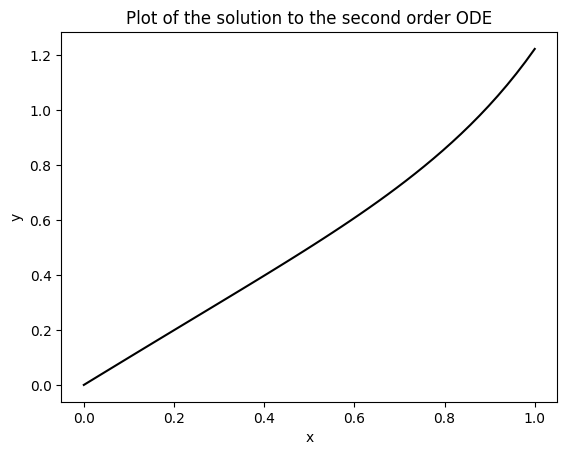

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.set_title("Plot of the solution to the second order ODE")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()
